In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from project import api_key
from project import email

In [2]:
list_state = ['48', '36', '06']
df = pd.DataFrame()
for state in list_state:
    try:
        url_quarterly = 'https://aqs.epa.gov/data/api/quarterlyData/byState?'
        params = {'email': email,
                 'key': api_key,
                 'param': '88101',
                 'bdate':'20200101',
                 'edate':'20201201',
                 'state': state}

        response_quarterly = requests.get(url_quarterly, params=params).json()
        data_quarterly =response_quarterly['Data']
        int_df = pd.DataFrame(data_quarterly)
        df = df.append(int_df)
        sleep(5)
    except:
        print('Oops something went wrong')
        pass

In [3]:
print(df.columns.tolist())

['state_code', 'county_code', 'site_number', 'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter', 'sample_duration', 'sample_duration_code', 'sample_duration_type', 'pollutant_standard', 'year', 'quarter', 'units_of_measure', 'event_type', 'observation_count', 'observation_percent', 'arithmetic_mean', 'minimum_value', 'maximum_value', 'quarterly_criteria_met', 'actual_days_gt_std', 'estimated_days_gt_std', 'valid_samples', 'valid_day_count', 'scheduled_samples', 'percent_days', 'percent_one_value', 'monitoring_agency_code', 'monitoring_agency', 'local_site_name', 'address', 'state', 'county', 'city', 'tribal_code', 'tribal_land', 'cbsa_code', 'cbsa', 'date_of_last_change']


In [4]:
df.to_csv('Air Quality.csv')

In [5]:
df = df.loc[df['pollutant_standard']=='PM25 Annual 2012']

In [6]:
df = df.loc[((df['event_type'] == 'No Events') | (df['event_type']=='Events Excluded'))]

In [7]:
print(pd.unique(df['quarter']))

['4' '3' '2' '1']


In [8]:
q1_df = df.loc[df['quarter']== '1']
q2_df = df.loc[df['quarter']== '2']
q3_df = df.loc[df['quarter']== '3']
q4_df = df.loc[df['quarter']== '4']

print(q1_df['arithmetic_mean'])

23       3.3791
58       8.4989
83       6.5571
110      8.0899
138      8.7119
         ...   
4556     4.9644
4584     7.0791
4612     4.3148
4640     4.0934
4668    11.3422
Name: arithmetic_mean, Length: 231, dtype: float64


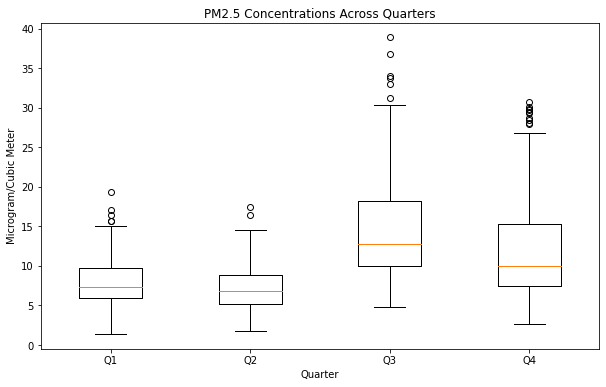

In [9]:
q1_df = q1_df.dropna(subset=['arithmetic_mean'])
q2_df = q2_df.dropna(subset=['arithmetic_mean'])

data_to_plot = [q1_df['arithmetic_mean'], q2_df['arithmetic_mean'], q3_df['arithmetic_mean'], q4_df['arithmetic_mean']]
plt.figure(figsize=(10, 6))
box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4],
                  labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('PM2.5 Concentrations Across Quarters')
plt.ylabel('Microgram/Cubic Meter')
plt.xlabel('Quarter')
plt.savefig('PM2.5 Concentrations Across Quarters Box.png')

In [15]:
q1_25 = np.quantile( q1_df['arithmetic_mean'], .25)
q1_median = np.quantile( q1_df['arithmetic_mean'], .5)
q1_75 = np.quantile( q1_df['arithmetic_mean'], .75)
print(q1_25, q2_median, q1_75)

5.97955 7.3655 9.753549999999999


In [18]:
q2_25 = np.quantile( q2_df['arithmetic_mean'], .25)
q2_median = np.quantile( q2_df['arithmetic_mean'], .5)
q2_75 = np.quantile( q2_df['arithmetic_mean'], .75)
print(q2_25, q2_median, q2_75)

5.1873249999999995 6.76845 8.90785


In [17]:
q3_25 = np.quantile(q3_df['arithmetic_mean'], .25)
q3_median = np.quantile(q3_df['arithmetic_mean'], .5)
q3_75 = np.quantile(q3_df['arithmetic_mean'], .75)
print(q3_25, q3_median, q3_75)

10.021425 12.7402 18.25275


In [16]:
q4_25 = np.quantile(q4_df['arithmetic_mean'], .25)
q4_median = np.quantile(q4_df['arithmetic_mean'], .5)
q4_75 = np.quantile(q4_df['arithmetic_mean'], .75)
print(q4_25, q4_median, q4_75)

7.413 10.0 15.2929


In [19]:
q1_mean = q1_df['arithmetic_mean'].mean()
q1_mean

8.027275652173914

In [20]:
q2_mean = q2_df['arithmetic_mean'].mean()
q2_mean

7.145295575221235

In [21]:
q3_mean = q3_df['arithmetic_mean'].mean()
q3_mean

14.718112608695654

In [22]:
q4_mean = q4_df['arithmetic_mean'].mean()
q4_mean

12.029293775933613

In [ ]:
quarter_means = [q1_mean, q2_mean, q3_mean, q4_mean]

In [ ]:
plt.plot(quarter_means)
plt.xticks(ticks = [0,1,2,3],labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.ylabel('Microgram/Cubic Meter')
plt.xlabel('Quarter')
plt.title('Average PM2.5 Concentrations Throughout the Year')
plt.savefig('PM2.5 Concentrations Throughout the Year.png')

# Conclusion
Based on the visual of the box plots and the statistics associated with each quarter, it seems likely that there is an effect of time of year on PM2.5 concentrations in California, New York, and Texas. Comparing Q2 to Q3, the mean Microgram/Cubic meter concentrations of PM2.5 in Q3(14.72) is more than double the concentrations in Q2(7.1). This is not simply due to outliers. The upper quartile of Q2(8.91) is less than the lower quartile of Q3(10.02). Due to the magnitude of difference between these measurements, there is strong evidence that time of year may be a significant factor in PM2.5 concentration. As these states represent three distinct geographic locations in the United States, further research may indicate that this phenomenom is present across the United States. 